## BIKE SHARING ASSIGNMENT | MULTIPLE LINEAR REGRESSION

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Table of Content:
1.) Understanding the data:

    - Importing the libraries and reading the data
    - Check the dataset for anomolies
    - Fix data types, missing values or impute
    - Visualize the data with respect to target variable

2.) Data Preparation:

    - Create dummy variables and binary numbers
    - Split the data into trainning and set
    - Re-scale the variables
    
3.) Trainning the Data:

    - Use RFE to check the main variables
    - Use manual and business understanding to check other variables also.

4.) Residual Analysis:

    - Plot residual errors
    
5.) Prediction on Test setup:

    - Use same model to test the test set
    - Using R2 compare the r-score
    
Note: In this dataset cnt column is target variable as cnt columns specifies below data:

cnt: count of total rental bikes including both casual and registered

### 1.) Understanding the data:

    - Importing the libraries and reading the data
    - Check the dataset for anomolies
    - Fix data types, missing values or impute
    - Visualize the data

In [1]:
#import require libraries
import numpy as np
import pandas as pd
import seaborn as sns                                       #use to visualize the insights and correlations with columns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split       #to split taining and test dataset
from sklearn.preprocessing import MinMaxScaler             #to scale all the variables in 0 to 1 range
import statsmodels.api as sm                               #for Linear regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor          #to check VIF
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings                                             #to ignore unwanted warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Observation: 

season, year, month and etc columns are in binary format which need to be correct as it might create mis-interpretation and prediction of model if kept in same format. 

Instant column has no use in prediction and not adding any value. So, it can be remove.

dteday column has its all data present in season, year, month, weekday columns. So, this dteday column can aso be remove

In [3]:
#Check shape of dataset through shape method
data.shape

(730, 16)

In [4]:
#Check null values and datatype of columns present in dataset through Info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observation:
1.) This dataset has only 1 object datatype column and remaining are numerical column

2.) Dataset has 0 null values in all columns

In [5]:
#Use Describe method to check min-max-mean values and outlier present in all columns
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Drop dteday and instant column from dataset as they are not adding any value in ML modeL
data.drop(columns = ['instant', 'dteday'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


#### Dataset characteristics from dataset data dictionary:
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
 Note: These characteristics will be use in below lines to convert columns into categorical variable to increase readiablity, visualization understanding and further feature extraction using ML model methods.

In [8]:
#Convert season, yr,mnth, holiday,weekday, workingday,weathersit columns into readable format to visualize them. Same converted column then be use for feature extraction by using get_dummy method to create predictive ML model
data.season = data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.yr = data.yr.replace({0: '2018', 1:'2019'})
data.mnth = data.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
data.holiday = data.holiday.replace({0:'No Holiday',1:'Holiday'})
data.weekday = data.weekday.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
data.workingday = data.workingday.replace({0:'workingday',1:'wkend_Holiday'})
data.weathersit = data.weathersit.replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Tue,wkend_Holiday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Wed,wkend_Holiday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Thurs,wkend_Holiday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Visualize the dataset to get better insight and understanding of data
1.) Use boxplot to visualize categorical variable with respect to target vaiable 'cnt'.

2.) Use scatter plot to visualize numerical variable with respect to target vaiable 'cnt'.

3.) Use heatmap to check correleation b/w different-different columns to each other

In [10]:
# First seperate out numerical and categorical variables from dataset to easily visualization
numerical_columns = data.select_dtypes(include = [np.number])
categorical_columns = data.select_dtypes(exclude = [np.number])
print(numerical_columns)
print(categorical_columns)

          temp     atemp      hum  windspeed  casual  registered   cnt
0    14.110847  18.18125  80.5833  10.749882     331         654   985
1    14.902598  17.68695  69.6087  16.652113     131         670   801
2     8.050924   9.47025  43.7273  16.636703     120        1229  1349
3     8.200000  10.60610  59.0435  10.739832     108        1454  1562
4     9.305237  11.46350  43.6957  12.522300      82        1518  1600
..         ...       ...      ...        ...     ...         ...   ...
725  10.420847  11.33210  65.2917  23.458911     247        1867  2114
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341
728  10.489153  11.58500  48.3333  23.500518     364        1432  1796
729   8.849153  11.17435  57.7500  10.374682     439        2290  2729

[730 rows x 7 columns]
     season    yr mnth     holiday weekday     workingday weathersit
0    spring  2018  Jan  No Holiday     Sun     workingd

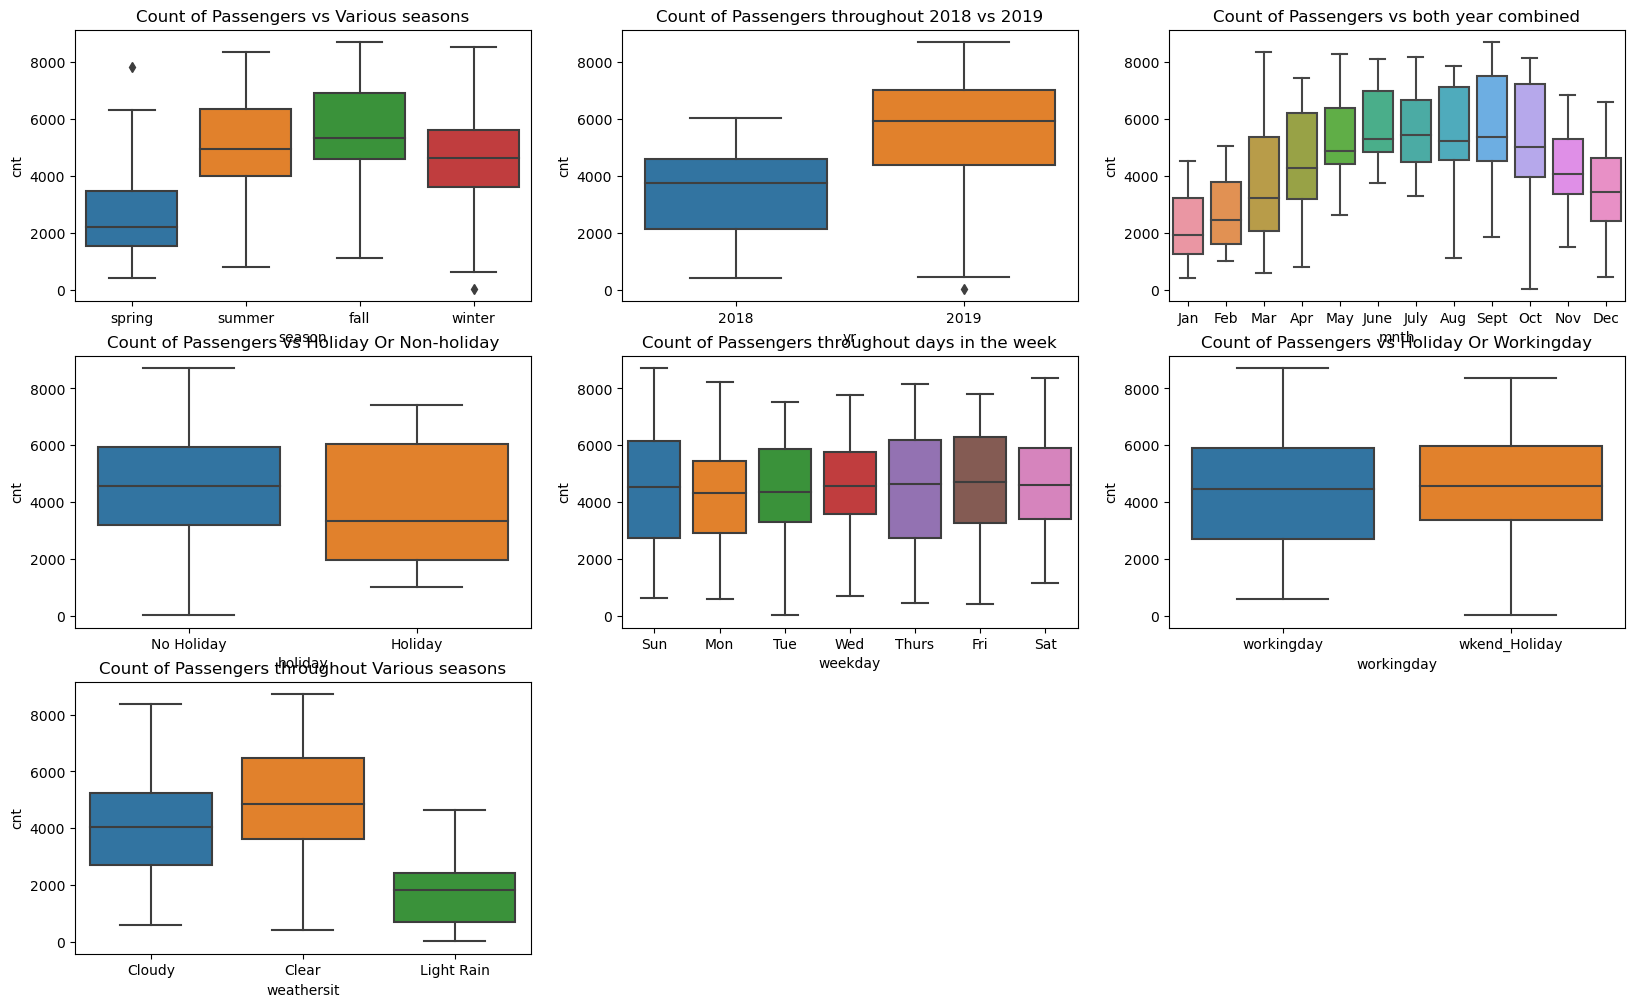

In [11]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)  #the figure has 3 row, 3 columns
sns.boxplot(x='season',y='cnt',data=data).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data).set_title('Count of Passengers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=data).set_title('Count of Passengers throughout Various seasons')

plt.show()


Insights obtained from Boxplot of various categorical variables:

- Count of Passengers in Fall season higher than other seasons
- Passenger's count is high in 2019
- Highest Passenger count is in september month
- During Clear weathersit, passenger count is high

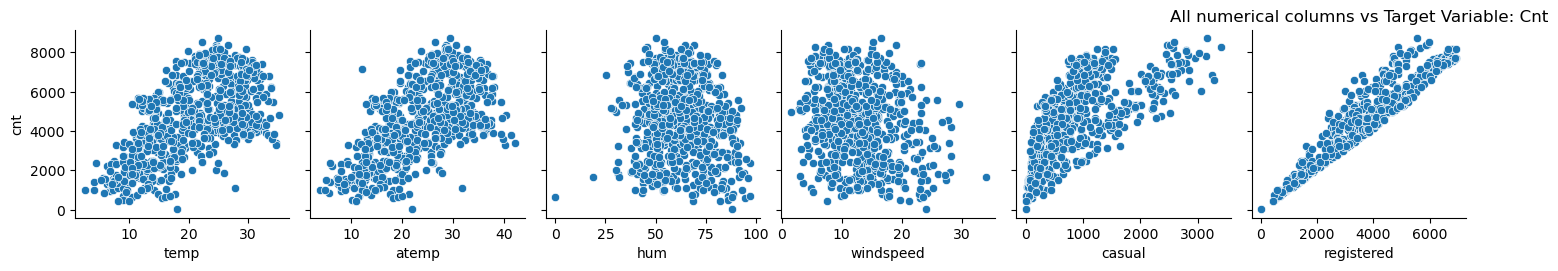

In [12]:
# Use scatter plot to visualize the numerical column vs target variable 'cnt'
sns.pairplot(data,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

Insights from numerical variable visualization scatterplot:

- Registered, casual are highly positively correlated with target vaiable
- temp and atemp independent variable are a bit less positively correlated with target variable

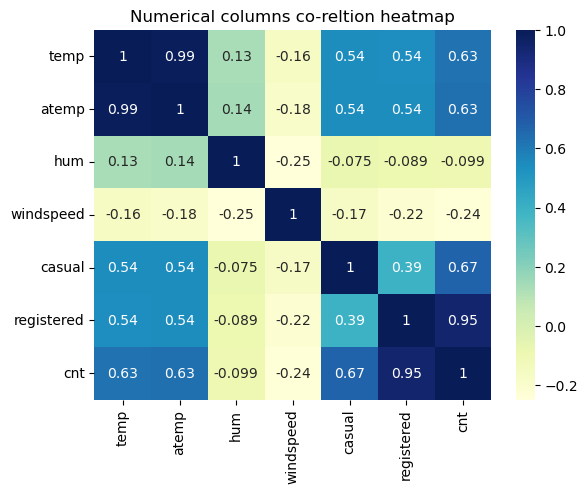

In [13]:
#Draw heatmap to check clear correlation b/w various columns
sns.heatmap(numerical_columns.corr(), cmap="YlGnBu", annot=True) 
plt.title("Numerical columns co-reltion heatmap")
plt.show()

### Data Preperation

- Dummy Variabe creation
- Re-scaling variables
- Split dataset into train and test dataset into 80:20 ratio

In [14]:
#Dummy variable creation through Get_dummy function. Add dtype = int to get integer output otherwise we will get Boolean output from get_dummies function
dummy_dataset = pd.get_dummies(data[categorical_columns.columns], drop_first = True, dtype = int)    #droping first dummy column to get n-1 dmy column
dummy_dataset.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [15]:
#Add dummy column dataset to original dataset
data1 = pd.concat([data, dummy_dataset], axis=1)
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,1,0,0,0,1,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,...,1,1,0,0,0,0,0,1,1,0
2,spring,2018,Jan,No Holiday,Tue,wkend_Holiday,Clear,8.050924,9.47025,43.7273,...,1,0,0,0,0,1,0,0,0,0
3,spring,2018,Jan,No Holiday,Wed,wkend_Holiday,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,No Holiday,Thurs,wkend_Holiday,Clear,9.305237,11.46350,43.6957,...,1,0,0,0,1,0,0,0,0,0


In [16]:
#Delete original columns from which dummy variables were created
data1.drop(data[categorical_columns.columns], axis =1, inplace = True)
data1.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,1,0,0,1,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,1,1,0,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
#Divide dataset into train and test dataset in 80-20 ratio
data1_train, data1_test = train_test_split(data1, train_size = 0.8, random_state = 100)

In [18]:
# scale all the variables through MinMaxScaler class
#Create instance of class
scale = MinMaxScaler()
scale_var = ['temp','atemp','hum','windspeed','casual','registered','cnt']
data1_train[scale_var] = scale.fit_transform(data1_train[scale_var])
data1_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
367,0.113228,0.061963,0.454701,0.695175,0.026516,0.307104,0.254717,1,0,0,...,1,0,0,0,0,0,1,0,0,0
648,0.468352,0.462175,0.477458,0.299450,0.253581,0.969679,0.868385,0,0,1,...,1,0,0,0,0,0,0,0,0,0
44,0.443431,0.419099,0.387290,0.807474,0.062786,0.243286,0.217556,1,0,0,...,1,0,0,0,0,1,0,0,0,0
705,0.326094,0.318824,0.787463,0.189819,0.105760,0.669795,0.573631,0,0,1,...,1,0,1,0,0,0,0,0,1,0
379,0.133996,0.108365,0.431945,0.449210,0.085949,0.289778,0.263346,1,0,0,...,1,1,0,0,0,0,0,1,0,0


In [19]:
#Pop out target variable from train dataset to train model
y_train = data1_train.pop('cnt')
X_train = data1_train

### Train the Model:

- Train the dataset to build a model having low P-value and high Adjusted-R square value
- Remove the columns which are having high VIF value more than 5. But, remove than one bt one only as by removing 1 high VIF column will impact other columns also.

In [20]:
#Add a constant as Stats model doesn't add constant automatically
X_train_sm = sm.add_constant(X_train)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.414e+30
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:41   Log-Likelihood:                 19463.
No. Observations:                 584   AIC:                        -3.886e+04
Df Residuals:                     553   BIC:                        -3.873e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                          0   3.78e-16          0      1.000   -7.43e-16    7.43e-16
temp                   1.776e-15   1.31e-15      1.353      0.177   -8.03e-16    4.36e-15
atemp                 -4.441e-16   1.28e-15     -0.346      0.730   -2.97e-15    2.08e-15
hum                   -5.412e-16   3.53e-16     -1.534      0.126   -1.23e-15    1.52e-16
windspeed             -4.996e-16   2.45e-16     -2.035      0.042   -9.82e-16   -1.75e-17
casual                    0.3775   3.53e-16   1.07e+15      0.000       0.377       0.377
registered                0.7968   4.26e-16   1.87e+15      0.000       0.797       0.797
season_spring                  0   2.64e-16          0      1.000   -5.19e-16    5.19e-16
season_summer         -1.249e-16   2.33e-16     -0.536      0.592   -5.83e-16    3.33e-16
season_winter         -8.327e-17   2.44e-16     -0.341      0.733   -5.63e-16    3.97e-16
yr_2019                2.914e-16   1.25e-16      2.327      0.020    4.54e-17    5.37e-16
mnth_Aug              -3.123e-16   2.99e-16     -1.045      0.297   -8.99e-16    2.75e-16
mnth_Dec               2.394e-16   2.96e-16      0.807      0.420   -3.43e-16    8.22e-16
mnth_Feb               7.633e-17   2.93e-16      0.261      0.795   -4.99e-16    6.52e-16
mnth_Jan               1.986e-16   3.02e-16      0.657      0.512   -3.95e-16    7.93e-16
mnth_July             -4.441e-16   3.09e-16     -1.438      0.151   -1.05e-15    1.63e-16
mnth_June              1.388e-17   2.18e-16      0.064      0.949   -4.14e-16    4.42e-16
mnth_Mar               1.527e-16   2.25e-16      0.678      0.498    -2.9e-16    5.95e-16
mnth_May               -2.22e-16   1.87e-16     -1.190      0.235   -5.89e-16    1.45e-16
mnth_Nov                       0   3.22e-16          0      1.000   -6.33e-16    6.33e-16
mnth_Oct               4.684e-17   3.13e-16      0.150      0.881   -5.67e-16    6.61e-16
mnth_Sept             -3.539e-16   2.84e-16     -1.247      0.213   -9.11e-16    2.03e-16
holiday_No Holiday     3.574e-16   1.63e-16      2.189      0.029    3.66e-17    6.78e-16
weekday_Mon             9.09e-16   1.71e-16      5.307      0.000    5.73e-16    1.25e-15
weekday_Sat           -1.388e-17    1.4e-16     -0.099      0.921   -2.88e-16     2.6e-16
weekday_Sun            6.835e-16   1.69e-16      4.033      0.000    3.51e-16    1.02e-15
weekday_Thurs          3.469e-17    1.3e-16      0.268      0.789    -2.2e-16    2.89e-16
weekday_Tue             1.11e-16   1.34e-16      0.831      0.406   -1.51e-16    3.73e-16
weekday_Wed           -8.327e-17   1.35e-16     -0.618      0.537   -3.48e-16    1.81e-16
workingday_workingday  2.151e-16   1.42e-16      1.515      0.130   -6.38e-17    4.94e-16
weathersit_Cloudy      7.633e-17    9.6e-17      0.795      0.427   -1.12e-16    2.65e-16
weathersit_Light Rain  

In [21]:
#Check VIF and remove independent variables having high variance and P-value
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,holiday_No Holiday,152.10
0,temp,73.10
28,workingday_workingday,62.19
1,atemp,61.67
22,weekday_Mon,35.98
24,weekday_Sun,34.57
6,season_spring,10.99
8,season_winter,9.37
7,season_summer,8.45
5,registered,8.04


### Observation: 
 - atemp has high VIF AND P-value both. So, first remove atemp from model and then recheck VIF and P-value

In [22]:
#drop atemp as it has both high VIF and p-value
X=X.drop('atemp', axis = 1)

In [23]:
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.420e+30
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:41   Log-Likelihood:                 19894.
No. Observations:                 584   AIC:                        -3.973e+04
Df Residuals:                     554   BIC:                        -3.960e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.527e-16   1.81e-16      0.845      0.398   -2.02e-16    5.07e-16
temp                  -2.776e-16   2.14e-16     -1.299      0.194   -6.97e-16    1.42e-16
hum                   -1.804e-16   1.68e-16     -1.073      0.284   -5.11e-16     1.5e-16
windspeed              -2.22e-16   1.15e-16     -1.936      0.053   -4.47e-16    3.26e-18
casual                    0.3775   1.68e-16   2.24e+15      0.000       0.377       0.377
registered                0.7968   2.03e-16   3.92e+15      0.000       0.797       0.797
season_spring         -6.245e-16   1.26e-16     -4.960      0.000   -8.72e-16   -3.77e-16
season_summer         -3.608e-16   1.11e-16     -3.247      0.001   -5.79e-16   -1.43e-16
season_winter         -3.469e-16   1.17e-16     -2.978      0.003   -5.76e-16   -1.18e-16
yr_2019               -2.463e-16   5.97e-17     -4.125      0.000   -3.64e-16   -1.29e-16
mnth_Aug              -2.047e-16   1.41e-16     -1.447      0.149   -4.83e-16    7.32e-17
mnth_Dec               2.949e-16   1.41e-16      2.084      0.038     1.7e-17    5.73e-16
mnth_Feb               6.939e-17    1.4e-16      0.496      0.620   -2.05e-16    3.44e-16
mnth_Jan              -9.433e-17   1.44e-16     -0.654      0.513   -3.78e-16    1.89e-16
mnth_July              1.058e-16   1.47e-16      0.720      0.472   -1.83e-16    3.95e-16
mnth_June              2.082e-16   1.03e-16      2.020      0.044    5.72e-18    4.11e-16
mnth_Mar               2.776e-16   1.07e-16      2.583      0.010    6.65e-17    4.89e-16
mnth_May               3.608e-16   8.86e-17      4.072      0.000    1.87e-16    5.35e-16
mnth_Nov               1.214e-16   1.54e-16      0.790      0.430   -1.81e-16    4.23e-16
mnth_Oct               8.153e-17   1.49e-16      0.547      0.585   -2.12e-16    3.75e-16
mnth_Sept             -9.714e-17   1.35e-16     -0.719      0.473   -3.63e-16    1.68e-16
holiday_No Holiday     3.695e-16   7.78e-17      4.747      0.000    2.17e-16    5.22e-16
weekday_Mon            3.955e-16   8.17e-17      4.840      0.000    2.35e-16    5.56e-16
weekday_Sat            3.851e-16   6.65e-17      5.795      0.000    2.55e-16    5.16e-16
weekday_Sun            3.149e-16   8.09e-17      3.894      0.000    1.56e-16    4.74e-16
weekday_Thurs          1.874e-16   6.18e-17      3.032      0.003     6.6e-17    3.09e-16
weekday_Tue            1.388e-16   6.37e-17      2.177      0.030    1.36e-17    2.64e-16
weekday_Wed            1.527e-16   6.43e-17      2.375      0.018    2.64e-17    2.79e-16
workingday_workingday -3.261e-16   6.78e-17     -4.814      0.000   -4.59e-16   -1.93e-16
weathersit_Cloudy      3.678e-16   4.58e-17      8.029      0.000    2.78e-16    4.58e-16
weathersit_Light Rain  4.788e-16   1.27e-16      3.775      0.000     2.3e-16    7.28e-16
=======================

In [24]:
#Check VIF and remove independent variables having high variance and P-value
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,holiday_No Holiday,152.09
27,workingday_workingday,62.17
21,weekday_Mon,35.96
23,weekday_Sun,34.56
5,season_spring,10.97
7,season_winter,9.35
0,temp,8.49
6,season_summer,8.43
4,registered,8.02
18,mnth_Oct,6.86


In [25]:
#drop 'holiday_No Holiday' as it has very high VIF value
X=X.drop('holiday_No Holiday', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.918e+29
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:42   Log-Likelihood:                 19198.
No. Observations:                 584   AIC:                        -3.834e+04
Df Residuals:                     554   BIC:                        -3.821e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.163e-17    6.8e-16     -0.061      0.951   -1.38e-15    1.29e-15
temp                  -1.943e-16   7.03e-16     -0.276      0.783   -1.58e-15    1.19e-15
hum                    7.494e-16   5.54e-16      1.353      0.177   -3.39e-16    1.84e-15
windspeed              2.325e-16   3.78e-16      0.615      0.539    -5.1e-16    9.75e-16
casual                    0.3775   5.55e-16   6.81e+14      0.000       0.377       0.377
registered                0.7968   6.69e-16   1.19e+15      0.000       0.797       0.797
season_spring         -4.025e-16   4.15e-16     -0.971      0.332   -1.22e-15    4.12e-16
season_summer         -8.327e-17   3.66e-16     -0.227      0.820   -8.02e-16    6.36e-16
season_winter          1.388e-16   3.84e-16      0.362      0.718   -6.15e-16    8.92e-16
yr_2019                1.214e-16   1.97e-16      0.617      0.537   -2.65e-16    5.08e-16
mnth_Aug              -2.359e-16   4.66e-16     -0.506      0.613   -1.15e-15    6.79e-16
mnth_Dec               2.776e-17   4.66e-16      0.060      0.953   -8.88e-16    9.43e-16
mnth_Feb               -4.58e-16    4.6e-16     -0.995      0.320   -1.36e-15    4.46e-16
mnth_Jan               7.228e-16   4.75e-16      1.521      0.129    -2.1e-16    1.66e-15
mnth_July              8.344e-16   4.84e-16      1.723      0.085   -1.17e-16    1.79e-15
mnth_June             -2.019e-15   3.39e-16     -5.948      0.000   -2.69e-15   -1.35e-15
mnth_Mar               6.661e-16   3.54e-16      1.882      0.060   -2.91e-17    1.36e-15
mnth_May                1.11e-15   2.92e-16      3.804      0.000    5.37e-16    1.68e-15
mnth_Nov               2.637e-16   5.06e-16      0.521      0.603   -7.31e-16    1.26e-15
mnth_Oct              -8.327e-17   4.91e-16     -0.169      0.865   -1.05e-15    8.82e-16
mnth_Sept              1.388e-16   4.45e-16      0.312      0.755   -7.36e-16    1.01e-15
weekday_Mon            1.249e-16   4.05e-16      0.309      0.758    -6.7e-16     9.2e-16
weekday_Sat            9.021e-17   2.19e-16      0.412      0.680    -3.4e-16     5.2e-16
weekday_Sun           -4.337e-17    4.1e-16     -0.106      0.916   -8.49e-16    7.62e-16
weekday_Thurs          1.665e-16   2.04e-16      0.818      0.414   -2.33e-16    5.66e-16
weekday_Tue            9.714e-17    2.1e-16      0.463      0.644   -3.15e-16    5.09e-16
weekday_Wed           -4.163e-17   2.12e-16     -0.197      0.844   -4.57e-16    3.74e-16
workingday_workingday   1.11e-16   3.84e-16      0.289      0.772   -6.43e-16    8.65e-16
weathersit_Cloudy     -1.388e-17   1.51e-16     -0.092      0.927    -3.1e-16    2.82e-16
weathersit_Light Rain  2.845e-16   4.18e-16      0.681      0.496   -5.36e-16     1.1e-15
==============================================================================
Omnibus:                      100.

In [26]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,52.12
4,registered,42.31
1,hum,39.58
26,workingday_workingday,16.38
7,season_winter,12.22
5,season_spring,12.07
3,casual,11.25
22,weekday_Sun,8.52
20,weekday_Mon,8.44
6,season_summer,7.67


In [27]:
#drop 'workingday_workingday' as it has very high VIF and p-value
X=X.drop('workingday_workingday', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.068e+29
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:42   Log-Likelihood:                 18996.
No. Observations:                 584   AIC:                        -3.793e+04
Df Residuals:                     555   BIC:                        -3.781e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.138e-15   9.55e-16      1.192      0.234   -7.38e-16    3.01e-15
temp                   1.665e-16   9.91e-16      0.168      0.867   -1.78e-15    2.11e-15
hum                    -1.11e-16   7.82e-16     -0.142      0.887   -1.65e-15    1.43e-15
windspeed               4.51e-17   5.34e-16      0.085      0.933      -1e-15    1.09e-15
casual                    0.3775   7.57e-16   4.99e+14      0.000       0.377       0.377
registered                0.7968   8.85e-16      9e+14      0.000       0.797       0.797
season_spring         -5.551e-17   5.86e-16     -0.095      0.925   -1.21e-15     1.1e-15
season_summer          8.327e-17   5.17e-16      0.161      0.872   -9.33e-16     1.1e-15
season_winter         -2.498e-16   5.42e-16     -0.461      0.645   -1.31e-15    8.15e-16
yr_2019                6.384e-16    2.7e-16      2.365      0.018    1.08e-16    1.17e-15
mnth_Aug              -6.939e-18   6.59e-16     -0.011      0.992    -1.3e-15    1.29e-15
mnth_Dec              -2.255e-16   6.57e-16     -0.343      0.732   -1.52e-15    1.07e-15
mnth_Feb              -4.163e-16    6.5e-16     -0.640      0.522   -1.69e-15    8.61e-16
mnth_Jan              -2.585e-16   6.71e-16     -0.385      0.700   -1.58e-15    1.06e-15
mnth_July              -2.29e-16   6.84e-16     -0.335      0.738   -1.57e-15    1.12e-15
mnth_June              -1.18e-16    4.8e-16     -0.246      0.806   -1.06e-15    8.25e-16
mnth_Mar              -9.714e-17      5e-16     -0.194      0.846   -1.08e-15    8.85e-16
mnth_May              -8.327e-17   4.12e-16     -0.202      0.840   -8.94e-16    7.27e-16
mnth_Nov               9.368e-17   7.13e-16      0.131      0.895   -1.31e-15    1.49e-15
mnth_Oct               4.857e-17   6.94e-16      0.070      0.944   -1.31e-15    1.41e-15
mnth_Sept             -2.082e-17   6.28e-16     -0.033      0.974   -1.25e-15    1.21e-15
weekday_Mon            2.411e-16   3.84e-16      0.628      0.530   -5.13e-16    9.95e-16
weekday_Sat            2.706e-16   3.09e-16      0.877      0.381   -3.36e-16    8.77e-16
weekday_Sun            2.082e-16   3.86e-16      0.539      0.590    -5.5e-16    9.67e-16
weekday_Thurs          1.041e-16   2.88e-16      0.362      0.718   -4.61e-16    6.69e-16
weekday_Tue            1.665e-16   2.95e-16      0.565      0.572   -4.12e-16    7.45e-16
weekday_Wed            2.498e-16   2.99e-16      0.835      0.404   -3.38e-16    8.37e-16
weathersit_Cloudy      3.018e-16   2.13e-16      1.419      0.157   -1.16e-16     7.2e-16
weathersit_Light Rain -2.845e-16   5.85e-16     -0.486      0.627   -1.43e-15    8.65e-16
==============================================================================
Omnibus:                       76.798   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarqu

In [28]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.38
1,hum,39.58
4,registered,37.49
7,season_winter,12.20
5,season_spring,12.04
3,casual,10.52
6,season_summer,7.62
18,mnth_Oct,6.66
8,yr_2019,5.92
9,mnth_Aug,5.75


In [29]:
#drop 'casual' as it has very high VIF and p-value
X=X.drop('casual', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     691.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:42   Log-Likelihood:                 1076.5
No. Observations:                 584   AIC:                            -2097.
Df Residuals:                     556   BIC:                            -1975.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0212      0.020     -1.050      0.294      -0.061       0.018
temp                      0.1440      0.020      7.181      0.000       0.105       0.183
hum                      -0.0363      0.016     -2.206      0.028      -0.069      -0.004
windspeed                -0.0480      0.011     -4.326      0.000      -0.070      -0.026
registered                0.8724      0.018     47.311      0.000       0.836       0.909
season_spring             0.0090      0.012      0.723      0.470      -0.015       0.033
season_summer             0.0315      0.011      2.899      0.004       0.010       0.053
season_winter            -0.0134      0.011     -1.167      0.244      -0.036       0.009
yr_2019                   0.0112      0.006      1.969      0.049     2.9e-05       0.022
mnth_Aug                 -0.0065      0.014     -0.468      0.640      -0.034       0.021
mnth_Dec                 -0.0129      0.014     -0.929      0.353      -0.040       0.014
mnth_Feb                 -0.0236      0.014     -1.723      0.085      -0.051       0.003
mnth_Jan                 -0.0200      0.014     -1.411      0.159      -0.048       0.008
mnth_July                -0.0138      0.014     -0.956      0.339      -0.042       0.015
mnth_June                -0.0178      0.010     -1.764      0.078      -0.038       0.002
mnth_Mar                 -0.0005      0.011     -0.051      0.959      -0.021       0.020
mnth_May                 -0.0152      0.009     -1.748      0.081      -0.032       0.002
mnth_Nov                  0.0085      0.015      0.562      0.574      -0.021       0.038
mnth_Oct                  0.0267      0.015      1.822      0.069      -0.002       0.055
mnth_Sept                 0.0121      0.013      0.914      0.361      -0.014       0.038
weekday_Mon               0.1003      0.007     14.492      0.000       0.087       0.114
weekday_Sat               0.0221      0.006      3.424      0.001       0.009       0.035
weekday_Sun               0.1154      0.007     17.668      0.000       0.103       0.128
weekday_Thurs            -0.0011      0.006     -0.180      0.858      -0.013       0.011
weekday_Tue               0.0147      0.006      2.378      0.018       0.003       0.027
weekday_Wed              -0.0004      0.006     -0.065      0.948      -0.013       0.012
weathersit_Cloudy        -0.0118      0.004     -2.646      0.008      -0.021      -0.003
weathersit_Light Rain    -0.0293      0.012     -2.378      0.018      -0.053      -0.005
==============================================================================
Omnibus:                       91.146   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.048
Skew:                           0.896   Prob(JB):       

In [30]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,47.00
1,hum,39.02
3,registered,36.44
6,season_winter,12.16
4,season_spring,12.04
5,season_summer,7.52
17,mnth_Oct,6.63
7,yr_2019,5.86
8,mnth_Aug,5.74
16,mnth_Nov,5.50


In [31]:
#drop 'hum' as it has very high VIF, p-value and less correlation value
X=X.drop('hum', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     712.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:54:43   Log-Likelihood:                 1074.0
No. Observations:                 584   AIC:                            -2094.
Df Residuals:                     557   BIC:                            -1976.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0379      0.019     -2.024      0.043      -0.075      -0.001
temp                      0.1309      0.019      6.811      0.000       0.093       0.169
windspeed                -0.0407      0.011     -3.830      0.000      -0.062      -0.020
registered                0.8778      0.018     47.868      0.000       0.842       0.914
season_spring             0.0090      0.012      0.725      0.469      -0.015       0.033
season_summer             0.0299      0.011      2.747      0.006       0.009       0.051
season_winter            -0.0147      0.011     -1.283      0.200      -0.037       0.008
yr_2019                   0.0109      0.006      1.910      0.057      -0.000       0.022
mnth_Aug                 -0.0071      0.014     -0.505      0.614      -0.034       0.020
mnth_Dec                 -0.0176      0.014     -1.280      0.201      -0.045       0.009
mnth_Feb                 -0.0266      0.014     -1.947      0.052      -0.054       0.000
mnth_Jan                 -0.0241      0.014     -1.708      0.088      -0.052       0.004
mnth_July                -0.0124      0.014     -0.856      0.392      -0.041       0.016
mnth_June                -0.0159      0.010     -1.573      0.116      -0.036       0.004
mnth_Mar                 -0.0024      0.011     -0.224      0.823      -0.023       0.018
mnth_May                 -0.0169      0.009     -1.944      0.052      -0.034       0.000
mnth_Nov                  0.0053      0.015      0.352      0.725      -0.024       0.035
mnth_Oct                  0.0234      0.015      1.605      0.109      -0.005       0.052
mnth_Sept                 0.0093      0.013      0.704      0.482      -0.017       0.035
weekday_Mon               0.1002      0.007     14.431      0.000       0.087       0.114
weekday_Sat               0.0221      0.006      3.416      0.001       0.009       0.035
weekday_Sun               0.1159      0.007     17.679      0.000       0.103       0.129
weekday_Thurs            -0.0017      0.006     -0.275      0.783      -0.014       0.010
weekday_Tue               0.0143      0.006      2.299      0.022       0.002       0.027
weekday_Wed              -0.0011      0.006     -0.171      0.865      -0.014       0.011
weathersit_Cloudy        -0.0171      0.004     -4.525      0.000      -0.025      -0.010
weathersit_Light Rain    -0.0378      0.012     -3.222      0.001      -0.061      -0.015
==============================================================================
Omnibus:                       90.151   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.148
Skew:                           0.894   Prob(JB):                     4.16e-38
Kurtosis:                       4.968   Cond. No.                  

In [32]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,36.95
2,registered,36.44
5,season_winter,11.99
3,season_spring,11.62
4,season_summer,6.51
16,mnth_Oct,6.18
6,yr_2019,5.82
7,mnth_Aug,5.55
11,mnth_July,5.13
1,windspeed,5.03


In [33]:
#drop 'registered' as it has very high VIF, p-value
X=X.drop('registered', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.77e-212
Time:                        11:54:43   Log-Likelihood:                 597.48
No. Observations:                 584   AIC:                            -1143.
Df Residuals:                     558   BIC:                            -1029.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2793      0.040      7.049      0.000       0.201       0.357
temp                      0.3937      0.042      9.460      0.000       0.312       0.475
windspeed                -0.1566      0.023     -6.696      0.000      -0.203      -0.111
season_spring            -0.0615      0.028     -2.204      0.028      -0.116      -0.007
season_summer             0.0329      0.025      1.338      0.181      -0.015       0.081
season_winter             0.1126      0.025      4.465      0.000       0.063       0.162
yr_2019                   0.2333      0.007     31.214      0.000       0.219       0.248
mnth_Aug                  0.0163      0.032      0.516      0.606      -0.046       0.078
mnth_Dec                 -0.0811      0.031     -2.621      0.009      -0.142      -0.020
mnth_Feb                 -0.0444      0.031     -1.436      0.152      -0.105       0.016
mnth_Jan                 -0.0814      0.032     -2.565      0.011      -0.144      -0.019
mnth_July                -0.0300      0.033     -0.917      0.360      -0.094       0.034
mnth_June                 0.0207      0.023      0.910      0.363      -0.024       0.065
mnth_Mar                 -0.0028      0.024     -0.119      0.905      -0.050       0.044
mnth_May                  0.0150      0.020      0.766      0.444      -0.023       0.053
mnth_Nov                 -0.0811      0.034     -2.402      0.017      -0.147      -0.015
mnth_Oct                 -0.0094      0.033     -0.287      0.775      -0.074       0.055
mnth_Sept                 0.0620      0.030      2.078      0.038       0.003       0.121
weekday_Mon              -0.0558      0.014     -4.027      0.000      -0.083      -0.029
weekday_Sat               0.0100      0.015      0.686      0.493      -0.019       0.039
weekday_Sun               0.0076      0.014      0.549      0.583      -0.020       0.035
weekday_Thurs             0.0013      0.014      0.093      0.926      -0.026       0.028
weekday_Tue              -0.0266      0.014     -1.913      0.056      -0.054       0.001
weekday_Wed              -0.0151      0.014     -1.055      0.292      -0.043       0.013
weathersit_Cloudy        -0.0803      0.008    -10.024      0.000      -0.096      -0.065
weathersit_Light Rain    -0.3000      0.023    -12.800      0.000      -0.346      -0.254
==============================================================================
Omnibus:                      120.820   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.907
Skew:                          -0.980   Prob(JB):                     7.82e-81
Kurtosis:                       6.365   Cond. No.                         32.7
==============================================================================

In [34]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,26.00
2,season_spring,11.59
4,season_winter,10.76
15,mnth_Oct,6.10
3,season_summer,5.84
6,mnth_Aug,5.30
10,mnth_July,5.05
1,windspeed,4.94
14,mnth_Nov,4.89
9,mnth_Jan,4.61


In [37]:
#drop Weekday Sat has high p-value 
X=X.drop('weekday_Sat', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.34e-213
Time:                        11:54:44   Log-Likelihood:                 597.24
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     559   BIC:                            -1035.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2846      0.039      7.324      0.000       0.208       0.361
temp                      0.3925      0.042      9.444      0.000       0.311       0.474
windspeed                -0.1564      0.023     -6.692      0.000      -0.202      -0.111
season_spring            -0.0612      0.028     -2.197      0.028      -0.116      -0.006
season_summer             0.0329      0.025      1.340      0.181      -0.015       0.081
season_winter             0.1129      0.025      4.481      0.000       0.063       0.162
yr_2019                   0.2332      0.007     31.225      0.000       0.218       0.248
mnth_Aug                  0.0170      0.032      0.538      0.591      -0.045       0.079
mnth_Dec                 -0.0814      0.031     -2.630      0.009      -0.142      -0.021
mnth_Feb                 -0.0445      0.031     -1.441      0.150      -0.105       0.016
mnth_Jan                 -0.0819      0.032     -2.583      0.010      -0.144      -0.020
mnth_July                -0.0291      0.033     -0.891      0.374      -0.093       0.035
mnth_June                 0.0211      0.023      0.926      0.355      -0.024       0.066
mnth_Mar                 -0.0033      0.024     -0.140      0.889      -0.050       0.044
mnth_May                  0.0151      0.020      0.769      0.442      -0.023       0.054
mnth_Nov                 -0.0818      0.034     -2.426      0.016      -0.148      -0.016
mnth_Oct                 -0.0096      0.033     -0.290      0.772      -0.074       0.055
mnth_Sept                 0.0621      0.030      2.082      0.038       0.004       0.121
weekday_Mon              -0.0606      0.012     -5.079      0.000      -0.084      -0.037
weekday_Sun               0.0028      0.012      0.234      0.815      -0.021       0.026
weekday_Thurs            -0.0035      0.012     -0.290      0.772      -0.027       0.020
weekday_Tue              -0.0314      0.012     -2.612      0.009      -0.055      -0.008
weekday_Wed              -0.0199      0.012     -1.597      0.111      -0.044       0.005
weathersit_Cloudy        -0.0800      0.008    -10.006      0.000      -0.096      -0.064
weathersit_Light Rain    -0.3009      0.023    -12.862      0.000      -0.347      -0.255
==============================================================================
Omnibus:                      121.057   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.431
Skew:                          -0.978   Prob(JB):                     8.14e-82
Kurtosis:                       6.394   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [38]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.71
2,season_spring,11.45
4,season_winter,10.69
15,mnth_Oct,6.05
3,season_summer,5.64
6,mnth_Aug,5.20
10,mnth_July,4.97
1,windspeed,4.92
14,mnth_Nov,4.85
9,mnth_Jan,4.57


In [39]:
#drop mnth_Aug has high p-value and VIF
X=X.drop('mnth_Aug', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.12e-214
Time:                        11:54:44   Log-Likelihood:                 597.09
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     560   BIC:                            -1041.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2943      0.034      8.573      0.000       0.227       0.362
temp                      0.3986      0.040      9.967      0.000       0.320       0.477
windspeed                -0.1574      0.023     -6.759      0.000      -0.203      -0.112
season_spring            -0.0676      0.025     -2.678      0.008      -0.117      -0.018
season_summer             0.0234      0.017      1.367      0.172      -0.010       0.057
season_winter             0.1092      0.024      4.508      0.000       0.062       0.157
yr_2019                   0.2330      0.007     31.243      0.000       0.218       0.248
mnth_Dec                 -0.0883      0.028     -3.139      0.002      -0.144      -0.033
mnth_Feb                 -0.0494      0.030     -1.674      0.095      -0.107       0.009
mnth_Jan                 -0.0863      0.031     -2.821      0.005      -0.146      -0.026
mnth_July                -0.0438      0.018     -2.447      0.015      -0.079      -0.009
mnth_June                 0.0132      0.017      0.758      0.449      -0.021       0.048
mnth_Mar                 -0.0079      0.022     -0.352      0.725      -0.052       0.036
mnth_May                  0.0110      0.018      0.608      0.543      -0.024       0.046
mnth_Nov                 -0.0900      0.030     -2.990      0.003      -0.149      -0.031
mnth_Oct                 -0.0186      0.028     -0.660      0.510      -0.074       0.037
mnth_Sept                 0.0492      0.018      2.764      0.006       0.014       0.084
weekday_Mon              -0.0605      0.012     -5.075      0.000      -0.084      -0.037
weekday_Sun               0.0030      0.012      0.250      0.803      -0.021       0.027
weekday_Thurs            -0.0034      0.012     -0.288      0.773      -0.027       0.020
weekday_Tue              -0.0315      0.012     -2.624      0.009      -0.055      -0.008
weekday_Wed              -0.0199      0.012     -1.601      0.110      -0.044       0.005
weathersit_Cloudy        -0.0797      0.008     -9.998      0.000      -0.095      -0.064
weathersit_Light Rain    -0.3008      0.023    -12.865      0.000      -0.347      -0.255
==============================================================================
Omnibus:                      120.296   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.122
Skew:                          -0.976   Prob(JB):                     1.91e-80
Kurtosis:                       6.358   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_spring,10.63
4,season_winter,10.42
0,temp,7.84
14,mnth_Oct,5.13
1,windspeed,4.91
8,mnth_Jan,4.57
13,mnth_Nov,4.50
7,mnth_Feb,4.00
6,mnth_Dec,3.94
3,season_summer,3.51


In [41]:
#drop season_spring has high p-value, VIF and less correlation
X=X.drop('season_spring', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.02e-213
Time:                        11:54:45   Log-Likelihood:                 593.37
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     561   BIC:                            -1040.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2648      0.033      8.100      0.000       0.201       0.329
temp                      0.4306      0.038     11.223      0.000       0.355       0.506
windspeed                -0.1636      0.023     -7.019      0.000      -0.209      -0.118
season_summer             0.0468      0.015      3.155      0.002       0.018       0.076
season_winter             0.1470      0.020      7.416      0.000       0.108       0.186
yr_2019                   0.2319      0.007     30.972      0.000       0.217       0.247
mnth_Dec                 -0.1156      0.026     -4.384      0.000      -0.167      -0.064
mnth_Feb                 -0.0942      0.024     -3.850      0.000      -0.142      -0.046
mnth_Jan                 -0.1287      0.026     -4.887      0.000      -0.180      -0.077
mnth_July                -0.0397      0.018     -2.212      0.027      -0.075      -0.004
mnth_June                 0.0049      0.017      0.284      0.776      -0.029       0.039
mnth_Mar                 -0.0415      0.019     -2.231      0.026      -0.078      -0.005
mnth_May                 -0.0019      0.017     -0.110      0.912      -0.036       0.032
mnth_Nov                 -0.1084      0.029     -3.681      0.000      -0.166      -0.051
mnth_Oct                 -0.0420      0.027     -1.553      0.121      -0.095       0.011
mnth_Sept                 0.0486      0.018      2.716      0.007       0.013       0.084
weekday_Mon              -0.0615      0.012     -5.132      0.000      -0.085      -0.038
weekday_Sun               0.0032      0.012      0.264      0.792      -0.020       0.027
weekday_Thurs            -0.0037      0.012     -0.312      0.755      -0.027       0.020
weekday_Tue              -0.0312      0.012     -2.582      0.010      -0.055      -0.007
weekday_Wed              -0.0200      0.013     -1.598      0.111      -0.045       0.005
weathersit_Cloudy        -0.0790      0.008     -9.861      0.000      -0.095      -0.063
weathersit_Light Rain    -0.2980      0.023    -12.690      0.000      -0.344      -0.252
==============================================================================
Omnibus:                      112.385   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.579
Skew:                          -0.934   Prob(JB):                     1.48e-70
Kurtosis:                       6.119   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.83
3,season_winter,7.17
1,windspeed,4.73
13,mnth_Oct,4.21
12,mnth_Nov,3.73
2,season_summer,2.89
5,mnth_Dec,2.43
4,yr_2019,2.10
11,mnth_May,1.94
8,mnth_July,1.77


In [43]:
#drop mnth_Nov has very high p-value but VIF is in acceptable range
X=X.drop('mnth_Nov', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.28e-211
Time:                        11:54:45   Log-Likelihood:                 586.40
No. Observations:                 584   AIC:                            -1129.
Df Residuals:                     562   BIC:                            -1033.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2023      0.028      7.162      0.000       0.147       0.258
temp                      0.4954      0.034     14.373      0.000       0.428       0.563
windspeed                -0.1658      0.024     -7.038      0.000      -0.212      -0.120
season_summer             0.0683      0.014      4.952      0.000       0.041       0.095
season_winter             0.0978      0.015      6.608      0.000       0.069       0.127
yr_2019                   0.2316      0.008     30.589      0.000       0.217       0.246
mnth_Dec                 -0.0419      0.017     -2.416      0.016      -0.076      -0.008
mnth_Feb                 -0.0500      0.022     -2.321      0.021      -0.092      -0.008
mnth_Jan                 -0.0792      0.023     -3.460      0.001      -0.124      -0.034
mnth_July                -0.0324      0.018     -1.796      0.073      -0.068       0.003
mnth_June                 0.0039      0.017      0.221      0.825      -0.030       0.038
mnth_Mar                 -0.0120      0.017     -0.708      0.479      -0.045       0.021
mnth_May                 -0.0031      0.018     -0.177      0.860      -0.038       0.032
mnth_Oct                  0.0360      0.017      2.118      0.035       0.003       0.069
mnth_Sept                 0.0792      0.016      4.942      0.000       0.048       0.111
weekday_Mon              -0.0609      0.012     -5.027      0.000      -0.085      -0.037
weekday_Sun               0.0041      0.012      0.333      0.739      -0.020       0.028
weekday_Thurs            -0.0043      0.012     -0.353      0.724      -0.028       0.020
weekday_Tue              -0.0312      0.012     -2.554      0.011      -0.055      -0.007
weekday_Wed              -0.0205      0.013     -1.618      0.106      -0.045       0.004
weathersit_Cloudy        -0.0786      0.008     -9.706      0.000      -0.095      -0.063
weathersit_Light Rain    -0.3011      0.024    -12.689      0.000      -0.348      -0.254
==============================================================================
Omnibus:                      115.936   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.473
Skew:                          -0.981   Prob(JB):                     5.16e-69
Kurtosis:                       6.012   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.83
1,windspeed,4.51
2,season_summer,2.81
3,season_winter,2.61
4,yr_2019,2.10
11,mnth_May,1.94
12,mnth_Oct,1.91
8,mnth_July,1.75
9,mnth_June,1.65
19,weathersit_Cloudy,1.59


In [45]:
#drop weekday_Wed has very high p-value but VIF is in acceptable range
X=X.drop('weekday_Wed', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.74e-212
Time:                        11:54:46   Log-Likelihood:                 585.05
No. Observations:                 584   AIC:                            -1128.
Df Residuals:                     563   BIC:                            -1036.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1961      0.028      6.997      0.000       0.141       0.251
temp                      0.4948      0.035     14.336      0.000       0.427       0.563
windspeed                -0.1660      0.024     -7.038      0.000      -0.212      -0.120
season_summer             0.0678      0.014      4.911      0.000       0.041       0.095
season_winter             0.0972      0.015      6.558      0.000       0.068       0.126
yr_2019                   0.2317      0.008     30.559      0.000       0.217       0.247
mnth_Dec                 -0.0413      0.017     -2.378      0.018      -0.075      -0.007
mnth_Feb                 -0.0515      0.022     -2.386      0.017      -0.094      -0.009
mnth_Jan                 -0.0797      0.023     -3.478      0.001      -0.125      -0.035
mnth_July                -0.0329      0.018     -1.820      0.069      -0.068       0.003
mnth_June                 0.0044      0.017      0.253      0.800      -0.030       0.039
mnth_Mar                 -0.0117      0.017     -0.690      0.490      -0.045       0.022
mnth_May                 -0.0034      0.018     -0.193      0.847      -0.038       0.031
mnth_Oct                  0.0352      0.017      2.071      0.039       0.002       0.069
mnth_Sept                 0.0797      0.016      4.967      0.000       0.048       0.111
weekday_Mon              -0.0539      0.011     -4.757      0.000      -0.076      -0.032
weekday_Sun               0.0110      0.011      0.962      0.336      -0.011       0.033
weekday_Thurs             0.0027      0.011      0.236      0.813      -0.020       0.025
weekday_Tue              -0.0242      0.011     -2.115      0.035      -0.047      -0.002
weathersit_Cloudy        -0.0787      0.008     -9.706      0.000      -0.095      -0.063
weathersit_Light Rain    -0.3005      0.024    -12.646      0.000      -0.347      -0.254
==============================================================================
Omnibus:                      115.119   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.038
Skew:                          -0.971   Prob(JB):                     3.89e-69
Kurtosis:                       6.028   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.36
1,windspeed,4.49
2,season_summer,2.79
3,season_winter,2.56
4,yr_2019,2.10
11,mnth_May,1.94
12,mnth_Oct,1.91
8,mnth_July,1.75
9,mnth_June,1.65
18,weathersit_Cloudy,1.58


In [47]:
#drop weekday_Mon has very high p-value but VIF is in acceptable range
X=X.drop('weekday_Mon', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.83e-208
Time:                        11:54:46   Log-Likelihood:                 573.54
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     564   BIC:                            -1020.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1730      0.028      6.150      0.000       0.118       0.228
temp                      0.5053      0.035     14.396      0.000       0.436       0.574
windspeed                -0.1642      0.024     -6.832      0.000      -0.211      -0.117
season_summer             0.0678      0.014      4.820      0.000       0.040       0.095
season_winter             0.0987      0.015      6.537      0.000       0.069       0.128
yr_2019                   0.2319      0.008     30.027      0.000       0.217       0.247
mnth_Dec                 -0.0386      0.018     -2.183      0.029      -0.073      -0.004
mnth_Feb                 -0.0501      0.022     -2.279      0.023      -0.093      -0.007
mnth_Jan                 -0.0763      0.023     -3.266      0.001      -0.122      -0.030
mnth_July                -0.0354      0.018     -1.924      0.055      -0.072       0.001
mnth_June                 0.0014      0.018      0.078      0.937      -0.034       0.036
mnth_Mar                 -0.0077      0.017     -0.446      0.656      -0.042       0.026
mnth_May                 -0.0024      0.018     -0.132      0.895      -0.038       0.033
mnth_Oct                  0.0333      0.017      1.923      0.055      -0.001       0.067
mnth_Sept                 0.0797      0.016      4.874      0.000       0.048       0.112
weekday_Sun               0.0262      0.011      2.349      0.019       0.004       0.048
weekday_Thurs             0.0177      0.011      1.595      0.111      -0.004       0.039
weekday_Tue              -0.0090      0.011     -0.805      0.421      -0.031       0.013
weathersit_Cloudy        -0.0768      0.008     -9.304      0.000      -0.093      -0.061
weathersit_Light Rain    -0.2978      0.024    -12.305      0.000      -0.345      -0.250
==============================================================================
Omnibus:                      103.303   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.390
Skew:                          -0.926   Prob(JB):                     8.54e-54
Kurtosis:                       5.572   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.14
1,windspeed,4.48
2,season_summer,2.77
3,season_winter,2.54
4,yr_2019,2.10
11,mnth_May,1.93
12,mnth_Oct,1.90
8,mnth_July,1.74
9,mnth_June,1.64
17,weathersit_Cloudy,1.58


In [49]:
#drop mnth_July has very high p-value but VIF is in acceptable range
X=X.drop('mnth_July', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.87e-209
Time:                        11:54:46   Log-Likelihood:                 571.63
No. Observations:                 584   AIC:                            -1105.
Df Residuals:                     565   BIC:                            -1022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1761      0.028      6.257      0.000       0.121       0.231
temp                      0.4829      0.033     14.548      0.000       0.418       0.548
windspeed                -0.1623      0.024     -6.742      0.000      -0.210      -0.115
season_summer             0.0719      0.014      5.156      0.000       0.045       0.099
season_winter             0.1017      0.015      6.764      0.000       0.072       0.131
yr_2019                   0.2324      0.008     30.026      0.000       0.217       0.248
mnth_Dec                 -0.0377      0.018     -2.123      0.034      -0.073      -0.003
mnth_Feb                 -0.0481      0.022     -2.184      0.029      -0.091      -0.005
mnth_Jan                 -0.0761      0.023     -3.253      0.001      -0.122      -0.030
mnth_June                 0.0115      0.017      0.677      0.499      -0.022       0.045
mnth_Mar                 -0.0044      0.017     -0.256      0.798      -0.038       0.029
mnth_May                  0.0037      0.018      0.210      0.833      -0.031       0.039
mnth_Oct                  0.0378      0.017      2.195      0.029       0.004       0.072
mnth_Sept                 0.0901      0.015      5.821      0.000       0.060       0.120
weekday_Sun               0.0259      0.011      2.319      0.021       0.004       0.048
weekday_Thurs             0.0186      0.011      1.675      0.095      -0.003       0.040
weekday_Tue              -0.0089      0.011     -0.789      0.430      -0.031       0.013
weathersit_Cloudy        -0.0757      0.008     -9.167      0.000      -0.092      -0.059
weathersit_Light Rain    -0.2993      0.024    -12.341      0.000      -0.347      -0.252
==============================================================================
Omnibus:                      108.535   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.368
Skew:                          -0.963   Prob(JB):                     1.76e-57
Kurtosis:                       5.652   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.87
1,windspeed,4.46
2,season_summer,2.67
3,season_winter,2.46
4,yr_2019,2.10
10,mnth_May,1.88
11,mnth_Oct,1.87
16,weathersit_Cloudy,1.57
8,mnth_June,1.51
5,mnth_Dec,1.40


In [51]:
#drop mnth_Oct has very high p-value but VIF is in acceptable range
X=X.drop('mnth_Oct', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.30e-209
Time:                        11:54:47   Log-Likelihood:                 569.15
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     566   BIC:                            -1024.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1744      0.028      6.178      0.000       0.119       0.230
temp                      0.4882      0.033     14.694      0.000       0.423       0.553
windspeed                -0.1619      0.024     -6.705      0.000      -0.209      -0.114
season_summer             0.0708      0.014      5.065      0.000       0.043       0.098
season_winter             0.1172      0.013      8.796      0.000       0.091       0.143
yr_2019                   0.2321      0.008     29.890      0.000       0.217       0.247
mnth_Dec                 -0.0484      0.017     -2.830      0.005      -0.082      -0.015
mnth_Feb                 -0.0486      0.022     -2.199      0.028      -0.092      -0.005
mnth_Jan                 -0.0761      0.023     -3.241      0.001      -0.122      -0.030
mnth_June                 0.0096      0.017      0.563      0.574      -0.024       0.043
mnth_Mar                 -0.0052      0.017     -0.300      0.764      -0.039       0.029
mnth_May                  0.0025      0.018      0.139      0.889      -0.033       0.037
mnth_Sept                 0.0834      0.015      5.479      0.000       0.054       0.113
weekday_Sun               0.0262      0.011      2.337      0.020       0.004       0.048
weekday_Thurs             0.0189      0.011      1.692      0.091      -0.003       0.041
weekday_Tue              -0.0084      0.011     -0.748      0.454      -0.031       0.014
weathersit_Cloudy        -0.0746      0.008     -9.021      0.000      -0.091      -0.058
weathersit_Light Rain    -0.2938      0.024    -12.139      0.000      -0.341      -0.246
==============================================================================
Omnibus:                      103.136   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.728
Skew:                          -0.928   Prob(JB):                     3.23e-53
Kurtosis:                       5.548   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.81
1,windspeed,4.46
2,season_summer,2.66
4,yr_2019,2.10
10,mnth_May,1.88
3,season_winter,1.67
15,weathersit_Cloudy,1.57
8,mnth_June,1.50
7,mnth_Jan,1.36
6,mnth_Feb,1.32


In [53]:
#drop mnth_June has very high p-value but VIF is in acceptable range
X=X.drop('mnth_June', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.27e-210
Time:                        11:54:47   Log-Likelihood:                 568.99
No. Observations:                 584   AIC:                            -1104.
Df Residuals:                     567   BIC:                            -1030.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1724      0.028      6.160      0.000       0.117       0.227
temp                      0.4929      0.032     15.355      0.000       0.430       0.556
windspeed                -0.1626      0.024     -6.747      0.000      -0.210      -0.115
season_summer             0.0738      0.013      5.696      0.000       0.048       0.099
season_winter             0.1174      0.013      8.812      0.000       0.091       0.144
yr_2019                   0.2319      0.008     29.914      0.000       0.217       0.247
mnth_Dec                 -0.0477      0.017     -2.798      0.005      -0.081      -0.014
mnth_Feb                 -0.0475      0.022     -2.162      0.031      -0.091      -0.004
mnth_Jan                 -0.0747      0.023     -3.201      0.001      -0.121      -0.029
mnth_Mar                 -0.0057      0.017     -0.332      0.740      -0.040       0.028
mnth_May                 -0.0012      0.017     -0.074      0.941      -0.034       0.031
mnth_Sept                 0.0825      0.015      5.454      0.000       0.053       0.112
weekday_Sun               0.0264      0.011      2.357      0.019       0.004       0.048
weekday_Thurs             0.0190      0.011      1.707      0.088      -0.003       0.041
weekday_Tue              -0.0084      0.011     -0.746      0.456      -0.030       0.014
weathersit_Cloudy        -0.0748      0.008     -9.074      0.000      -0.091      -0.059
weathersit_Light Rain    -0.2942      0.024    -12.166      0.000      -0.342      -0.247
==============================================================================
Omnibus:                      102.671   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.185
Skew:                          -0.926   Prob(JB):                     1.15e-52
Kurtosis:                       5.530   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.41
0,temp,4.30
2,season_summer,2.32
4,yr_2019,2.09
3,season_winter,1.65
9,mnth_May,1.62
14,weathersit_Cloudy,1.56
7,mnth_Jan,1.36
6,mnth_Feb,1.32
12,weekday_Thurs,1.29


In [55]:
#drop mnth_May has very high p-value but VIF is in acceptable range
X=X.drop('mnth_May', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.45e-211
Time:                        11:54:47   Log-Likelihood:                 568.99
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     568   BIC:                            -1036.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1724      0.028      6.168      0.000       0.118       0.227
temp                      0.4928      0.032     15.400      0.000       0.430       0.556
windspeed                -0.1625      0.024     -6.764      0.000      -0.210      -0.115
season_summer             0.0733      0.012      6.378      0.000       0.051       0.096
season_winter             0.1174      0.013      8.819      0.000       0.091       0.143
yr_2019                   0.2319      0.008     29.992      0.000       0.217       0.247
mnth_Dec                 -0.0477      0.017     -2.802      0.005      -0.081      -0.014
mnth_Feb                 -0.0476      0.022     -2.167      0.031      -0.091      -0.004
mnth_Jan                 -0.0748      0.023     -3.208      0.001      -0.121      -0.029
mnth_Mar                 -0.0056      0.017     -0.327      0.744      -0.039       0.028
mnth_Sept                 0.0825      0.015      5.465      0.000       0.053       0.112
weekday_Sun               0.0264      0.011      2.363      0.018       0.004       0.048
weekday_Thurs             0.0190      0.011      1.708      0.088      -0.003       0.041
weekday_Tue              -0.0084      0.011     -0.746      0.456      -0.030       0.014
weathersit_Cloudy        -0.0749      0.008     -9.097      0.000      -0.091      -0.059
weathersit_Light Rain    -0.2941      0.024    -12.176      0.000      -0.342      -0.247
==============================================================================
Omnibus:                      102.726   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.596
Skew:                          -0.926   Prob(JB):                     9.38e-53
Kurtosis:                       5.533   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.38
0,temp,4.23
4,yr_2019,2.09
2,season_summer,1.75
3,season_winter,1.65
13,weathersit_Cloudy,1.56
7,mnth_Jan,1.36
6,mnth_Feb,1.32
11,weekday_Thurs,1.29
10,weekday_Sun,1.28


In [57]:
#drop mnth_Feb has very high p-value but VIF is in acceptable range
X=X.drop('mnth_Feb', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.13e-211
Time:                        11:54:47   Log-Likelihood:                 566.58
No. Observations:                 584   AIC:                            -1103.
Df Residuals:                     569   BIC:                            -1038.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1316      0.021      6.355      0.000       0.091       0.172
temp                      0.5390      0.024     22.538      0.000       0.492       0.586
windspeed                -0.1629      0.024     -6.758      0.000      -0.210      -0.116
season_summer             0.0851      0.010      8.355      0.000       0.065       0.105
season_winter             0.1339      0.011     12.236      0.000       0.112       0.155
yr_2019                   0.2309      0.008     29.821      0.000       0.216       0.246
mnth_Dec                 -0.0321      0.015     -2.073      0.039      -0.062      -0.002
mnth_Jan                 -0.0428      0.018     -2.364      0.018      -0.078      -0.007
mnth_Mar                  0.0129      0.015      0.868      0.386      -0.016       0.042
mnth_Sept                 0.0877      0.015      5.864      0.000       0.058       0.117
weekday_Sun               0.0266      0.011      2.367      0.018       0.005       0.049
weekday_Thurs             0.0184      0.011      1.645      0.101      -0.004       0.040
weekday_Tue              -0.0088      0.011     -0.776      0.438      -0.031       0.013
weathersit_Cloudy        -0.0751      0.008     -9.098      0.000      -0.091      -0.059
weathersit_Light Rain    -0.2920      0.024    -12.060      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       91.137   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.120
Skew:                          -0.859   Prob(JB):                     4.27e-43
Kurtosis:                       5.251   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.10
1,windspeed,3.72
4,yr_2019,2.06
2,season_summer,1.65
3,season_winter,1.57
12,weathersit_Cloudy,1.53
6,mnth_Jan,1.28
10,weekday_Thurs,1.28
9,weekday_Sun,1.27
11,weekday_Tue,1.27


In [59]:
#drop weekday_Tue has very high p-value but VIF is in acceptable range
X=X.drop('weekday_Tue', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     220.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.80e-212
Time:                        11:54:48   Log-Likelihood:                 566.28
No. Observations:                 584   AIC:                            -1105.
Df Residuals:                     570   BIC:                            -1043.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1300      0.021      6.311      0.000       0.090       0.170
temp                      0.5394      0.024     22.563      0.000       0.492       0.586
windspeed                -0.1635      0.024     -6.789      0.000      -0.211      -0.116
season_summer             0.0849      0.010      8.347      0.000       0.065       0.105
season_winter             0.1337      0.011     12.229      0.000       0.112       0.155
yr_2019                   0.2308      0.008     29.821      0.000       0.216       0.246
mnth_Dec                 -0.0321      0.015     -2.077      0.038      -0.063      -0.002
mnth_Jan                 -0.0432      0.018     -2.387      0.017      -0.079      -0.008
mnth_Mar                  0.0129      0.015      0.865      0.387      -0.016       0.042
mnth_Sept                 0.0876      0.015      5.864      0.000       0.058       0.117
weekday_Sun               0.0285      0.011      2.598      0.010       0.007       0.050
weekday_Thurs             0.0202      0.011      1.857      0.064      -0.001       0.042
weathersit_Cloudy        -0.0753      0.008     -9.126      0.000      -0.091      -0.059
weathersit_Light Rain    -0.2923      0.024    -12.078      0.000      -0.340      -0.245
==============================================================================
Omnibus:                       90.136   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.846
Skew:                          -0.851   Prob(JB):                     1.33e-42
Kurtosis:                       5.243   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.04
1,windspeed,3.69
4,yr_2019,2.05
2,season_summer,1.64
3,season_winter,1.56
11,weathersit_Cloudy,1.53
6,mnth_Jan,1.27
10,weekday_Thurs,1.23
5,mnth_Dec,1.22
9,weekday_Sun,1.22


In [61]:
#drop weekday_Sun has very high p-value but VIF is in acceptable range
X=X.drop('weekday_Sun', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.03e-212
Time:                        11:54:48   Log-Likelihood:                 562.84
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     571   BIC:                            -1043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1340      0.021      6.489      0.000       0.093       0.174
temp                      0.5399      0.024     22.476      0.000       0.493       0.587
windspeed                -0.1605      0.024     -6.639      0.000      -0.208      -0.113
season_summer             0.0846      0.010      8.276      0.000       0.065       0.105
season_winter             0.1337      0.011     12.162      0.000       0.112       0.155
yr_2019                   0.2300      0.008     29.595      0.000       0.215       0.245
mnth_Dec                 -0.0311      0.016     -2.000      0.046      -0.062      -0.001
mnth_Jan                 -0.0428      0.018     -2.352      0.019      -0.079      -0.007
mnth_Mar                  0.0135      0.015      0.902      0.368      -0.016       0.043
mnth_Sept                 0.0885      0.015      5.896      0.000       0.059       0.118
weekday_Thurs             0.0151      0.011      1.404      0.161      -0.006       0.036
weathersit_Cloudy        -0.0753      0.008     -9.078      0.000      -0.092      -0.059
weathersit_Light Rain    -0.2906      0.024    -11.949      0.000      -0.338      -0.243
==============================================================================
Omnibus:                       83.166   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.775
Skew:                          -0.782   Prob(JB):                     2.05e-40
Kurtosis:                       5.251   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.97
1,windspeed,3.65
4,yr_2019,2.05
2,season_summer,1.64
3,season_winter,1.56
10,weathersit_Cloudy,1.53
6,mnth_Jan,1.26
5,mnth_Dec,1.22
8,mnth_Sept,1.21
9,weekday_Thurs,1.19


In [63]:
#drop mnth_Dec has very high p-value but VIF is in acceptable range
X=X.drop('mnth_Dec', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.24e-212
Time:                        11:54:48   Log-Likelihood:                 560.80
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     572   BIC:                            -1045.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1186      0.019      6.173      0.000       0.081       0.156
temp                      0.5569      0.023     24.713      0.000       0.513       0.601
windspeed                -0.1557      0.024     -6.455      0.000      -0.203      -0.108
season_summer             0.0877      0.010      8.647      0.000       0.068       0.108
season_winter             0.1328      0.011     12.063      0.000       0.111       0.154
yr_2019                   0.2296      0.008     29.472      0.000       0.214       0.245
mnth_Jan                 -0.0325      0.017     -1.857      0.064      -0.067       0.002
mnth_Mar                  0.0191      0.015      1.296      0.195      -0.010       0.048
mnth_Sept                 0.0913      0.015      6.086      0.000       0.062       0.121
weekday_Thurs             0.0153      0.011      1.413      0.158      -0.006       0.036
weathersit_Cloudy        -0.0753      0.008     -9.061      0.000      -0.092      -0.059
weathersit_Light Rain    -0.2901      0.024    -11.898      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       79.327   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.487
Skew:                          -0.763   Prob(JB):                     4.27e-37
Kurtosis:                       5.135   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.95
1,windspeed,3.59
4,yr_2019,2.04
2,season_summer,1.63
9,weathersit_Cloudy,1.52
3,season_winter,1.45
5,mnth_Jan,1.25
7,mnth_Sept,1.21
8,weekday_Thurs,1.19
6,mnth_Mar,1.18


In [65]:
#drop mnth_Mar has very high p-value but VIF is in acceptable range
X=X.drop('mnth_Mar', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.01e-213
Time:                        11:54:48   Log-Likelihood:                 559.95
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     573   BIC:                            -1050.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1268      0.018      6.978      0.000       0.091       0.162
temp                      0.5478      0.021     25.566      0.000       0.506       0.590
windspeed                -0.1545      0.024     -6.405      0.000      -0.202      -0.107
season_summer             0.0870      0.010      8.584      0.000       0.067       0.107
season_winter             0.1286      0.011     12.227      0.000       0.108       0.149
yr_2019                   0.2296      0.008     29.457      0.000       0.214       0.245
mnth_Jan                 -0.0391      0.017     -2.335      0.020      -0.072      -0.006
mnth_Sept                 0.0902      0.015      6.022      0.000       0.061       0.120
weekday_Thurs             0.0153      0.011      1.414      0.158      -0.006       0.036
weathersit_Cloudy        -0.0755      0.008     -9.073      0.000      -0.092      -0.059
weathersit_Light Rain    -0.2897      0.024    -11.876      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       80.056   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.108
Skew:                          -0.759   Prob(JB):                     1.56e-38
Kurtosis:                       5.203   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.92
1,windspeed,3.32
4,yr_2019,2.03
2,season_summer,1.63
8,weathersit_Cloudy,1.51
3,season_winter,1.42
5,mnth_Jan,1.23
6,mnth_Sept,1.20
7,weekday_Thurs,1.19
9,weathersit_Light Rain,1.08


In [67]:
#drop weekday_Thurs has very high p-value but VIF is in acceptable range
X=X.drop('weekday_Thurs', axis = 1)
# Fit the model again
X_train_sm = sm.add_constant(X)
#create a model
lr = sm.OLS(y_train, X_train_sm)
#fit the model
lr_model = lr.fit()
#get summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     310.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.49e-214
Time:                        11:54:48   Log-Likelihood:                 558.93
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     574   BIC:                            -1054.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1289      0.018      7.115      0.000       0.093       0.165
temp                      0.5484      0.021     25.576      0.000       0.506       0.591
windspeed                -0.1553      0.024     -6.436      0.000      -0.203      -0.108
season_summer             0.0871      0.010      8.591      0.000       0.067       0.107
season_winter             0.1284      0.011     12.205      0.000       0.108       0.149
yr_2019                   0.2297      0.008     29.448      0.000       0.214       0.245
mnth_Jan                 -0.0390      0.017     -2.328      0.020      -0.072      -0.006
mnth_Sept                 0.0903      0.015      6.023      0.000       0.061       0.120
weathersit_Cloudy        -0.0755      0.008     -9.072      0.000      -0.092      -0.059
weathersit_Light Rain    -0.2860      0.024    -11.783      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       83.433   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.306
Skew:                          -0.786   Prob(JB):                     2.59e-40
Kurtosis:                       5.241   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#Check VIF 
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.84
1,windspeed,3.32
4,yr_2019,2.03
2,season_summer,1.63
7,weathersit_Cloudy,1.51
3,season_winter,1.42
5,mnth_Jan,1.22
6,mnth_Sept,1.20
8,weathersit_Light Rain,1.07


### Residual Analysis:

<Axes: ylabel='Density'>

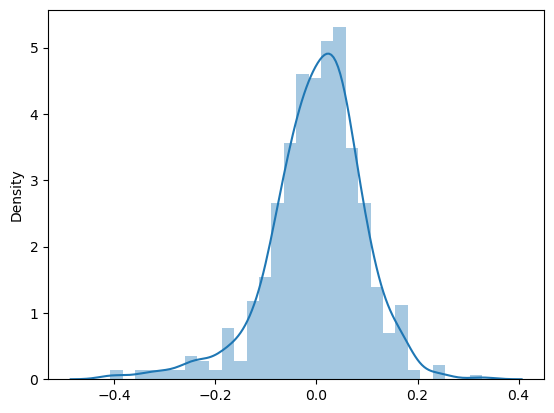

In [69]:
# We need to make prediction of y_train_pred using our X_train with constant.
y_train_pred = lr_model.predict(X_train_sm)
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred
# Plot the distribution of errors through displot. Mean should be approx at 0.
sns.distplot(res)

### Prediction and Evaluation on Test set: 

In [70]:
#create list of numeric vars
scale_var = ['temp','atemp','hum','windspeed','casual','registered','cnt']

#Fit on data
data1_test[scale_var] = scale.transform(data1_test[scale_var])
data1_test.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
184,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,0,0,...,0,0,0,0,0,1,0,1,1,0
535,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,1,0,...,1,0,0,0,1,0,0,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,0,1,...,1,0,0,0,0,0,0,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,0,0,...,1,0,0,0,1,0,0,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
data1_test.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Cloudy,weathersit_Light Rain
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.261067,0.525614,0.517368,0.226027,0.273973,0.219178,...,0.965753,0.102740,0.219178,0.116438,0.089041,0.123288,0.178082,0.253425,0.315068,0.034247
std,0.238088,0.222120,0.156357,0.161524,0.223963,0.204079,0.212757,0.419697,0.447530,0.415114,...,0.182488,0.304664,0.415114,0.321854,0.285783,0.329899,0.383899,0.436469,0.466142,0.182488
min,0.046591,0.025950,0.261915,-0.042808,0.009753,0.065261,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.092502,0.398823,0.391251,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.214416,0.528877,0.508916,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.331759,0.651639,0.649994,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.800793,1.038708,0.955819,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the test set into x_test and y_test

In [72]:
#Pop out target variable from test dataset to test model
y_test = data1_test.pop('cnt')
X_test = data1_test

In [75]:
#Add a constant as Stats model doesn't add constant automatically
X_test_sm = sm.add_constant(X_test)
#Drop column which are not require as per train data analysis
X_test_sm = X_test_sm.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [76]:
#predict
y_pred_sm = lr_model.predict(X_test_sm)

### Evaluate the Model

In [77]:
#Evaluate the model through R-square value
r_squared = round(r2_score(y_true = y_test, y_pred =y_pred_sm ),4)
r_squared

0.7563

#### Calculate the MSE(Mean Square Value), RMSE(Root mean Square value) and Adjusted R_square value

In [78]:
#Check mean squared error
mean_squared_error(y_test, y_pred_sm)

0.010953812110680552

In [79]:
#Check root mean squared error by square root of MSE
np.sqrt(mean_squared_error(y_test, y_pred_sm))

0.10466046106663467

In [80]:
#Adusted R-Square value. Formula - adjusted R2 =1-((1-R2)(N-1)/N-K-1 )
n = round(X_test_sm.shape[0],4)
k = round(X_test_sm.shape[1],4)
adjustedR_square = round(1-(1-r_squared)*(n-1)/(n-k-1),4)
adjustedR_square

0.7382

Text(0, 0.5, 'y_pred')

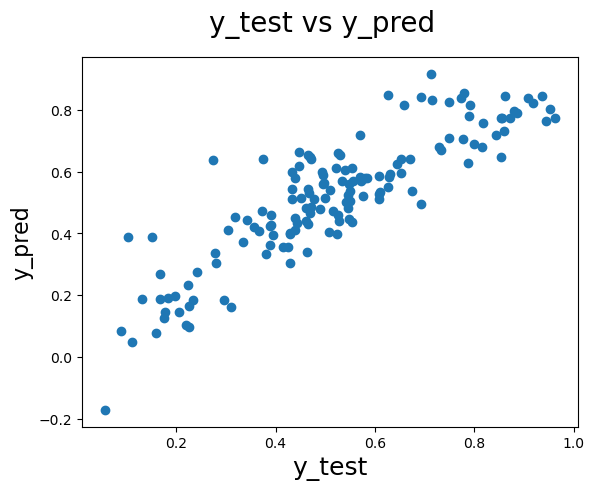

In [81]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_sm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 